In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('/home/mllab/Downloads/Concrete_Data.xls',sheet_name='Sheet1')

In [17]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 840.2 kB/s eta 0:00:00MB/s eta 0:00:01:01


In [3]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [7]:
columns=list(df.columns)

In [6]:
columns

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

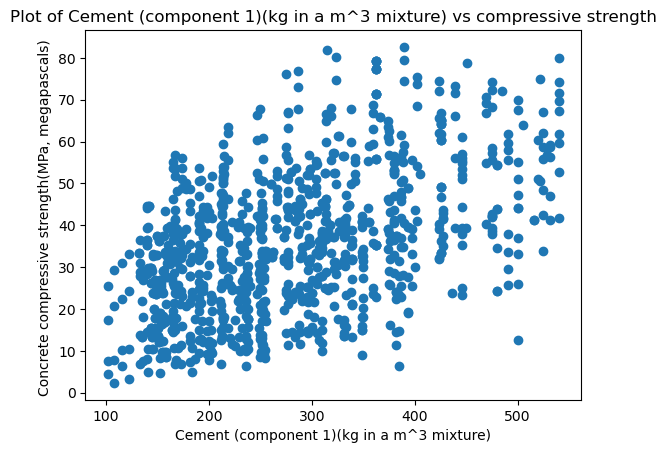

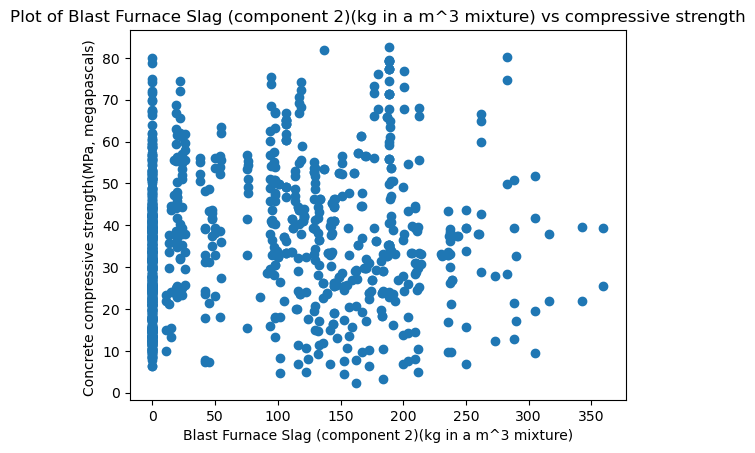

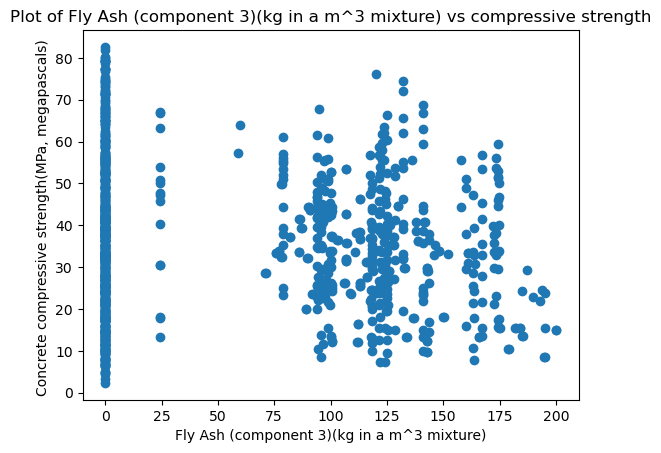

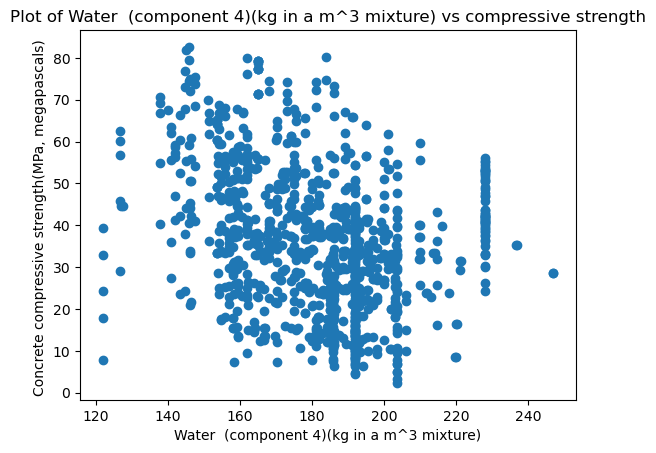

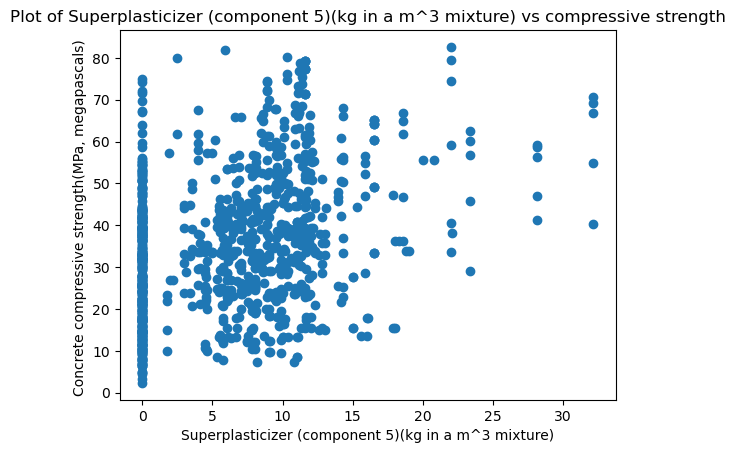

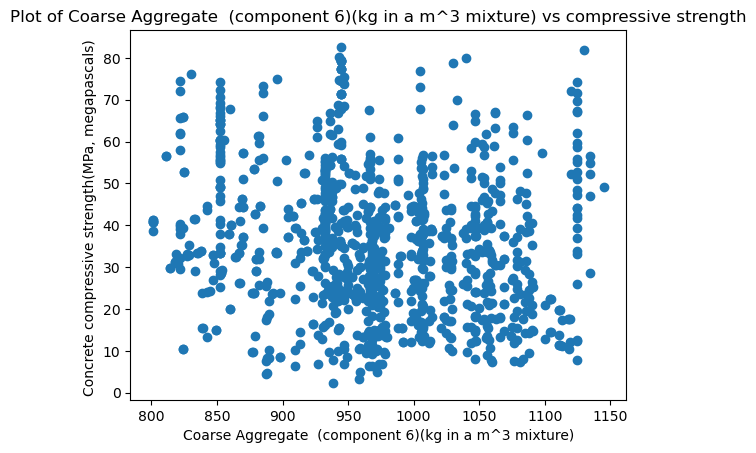

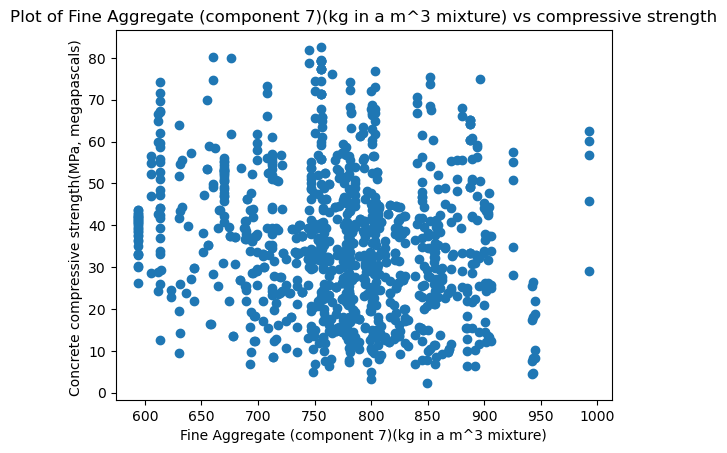

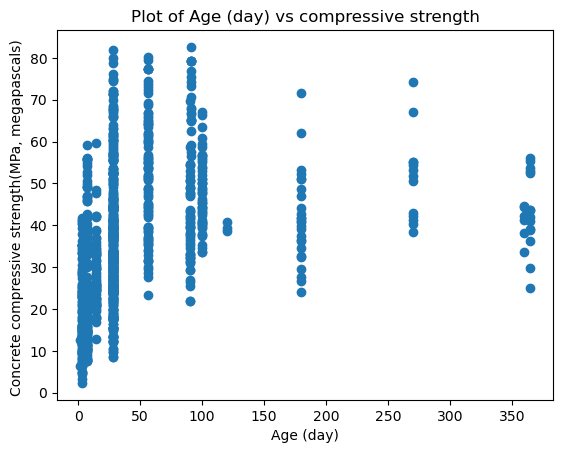

In [12]:
for i in range(len(columns)-1):
    plt.title(f"Plot of {columns[i]} vs compressive strength")
    plt.xlabel(columns[i])
    plt.ylabel(columns[8])
    plt.scatter(df[columns[i]].values,df[columns[8]].values)
    plt.show()

In [126]:
X=np.array([df[columns[i]].values for i in range(len(columns)-1)])
X=np.vstack((X,np.zeros(df[columns[0]].size)))
X=X.T

# X=np.vstack((df[columns[0]].values,np.zeros(df[columns[0]].size)))
# X=X.T
X.astype('f')

array([[540. ,   0. ,   0. , ..., 676. ,  28. ,   0. ],
       [540. ,   0. ,   0. , ..., 676. ,  28. ,   0. ],
       [332.5, 142.5,   0. , ..., 594. , 270. ,   0. ],
       ...,
       [148.5, 139.4, 108.6, ..., 780. ,  28. ,   0. ],
       [159.1, 186.7,   0. , ..., 788.9,  28. ,   0. ],
       [260.9, 100.5,  78.3, ..., 761.5,  28. ,   0. ]], dtype=float32)

In [127]:
X

array([[540. ,   0. ,   0. , ..., 676. ,  28. ,   0. ],
       [540. ,   0. ,   0. , ..., 676. ,  28. ,   0. ],
       [332.5, 142.5,   0. , ..., 594. , 270. ,   0. ],
       ...,
       [148.5, 139.4, 108.6, ..., 780. ,  28. ,   0. ],
       [159.1, 186.7,   0. , ..., 788.9,  28. ,   0. ],
       [260.9, 100.5,  78.3, ..., 761.5,  28. ,   0. ]])

In [128]:
Y=np.array(df[columns[8]].values)
Y=Y.T
Y.astype('f')

array([79.986115, 61.887367, 40.269535, ..., 23.6966  , 32.768036,
       32.401234], dtype=float32)

In [132]:
def model(X,Y,alpha,iterations):
    theta=np.zeros(9)
    theta=theta.T
    m=Y.size
    cost_list=[]
    theta_list=[]
    for i in range(iterations):
        y_pred=np.dot(X,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred-Y))
        dtheta=(1/m)*np.matmul(X.T,(y_pred-Y))
        theta=theta-alpha*dtheta
        cost_list.append(cost)
        theta_list.append(theta[0])
    return theta,cost_list,theta_list
        

In [133]:
theta,cost_list,theta_list=model(X,Y,0.000001,1000)

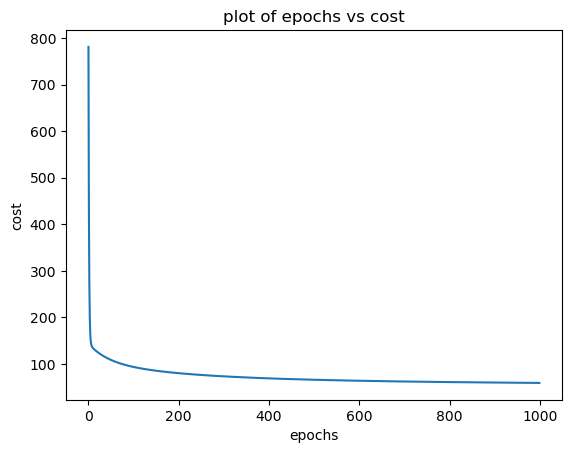

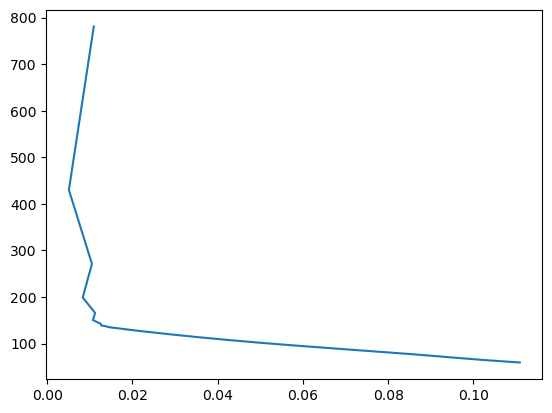

In [134]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('plot of epochs vs cost')
plt.plot(list(range(len(cost_list))),cost_list)
plt.show()
plt.plot(theta_list,cost_list)
plt.show()

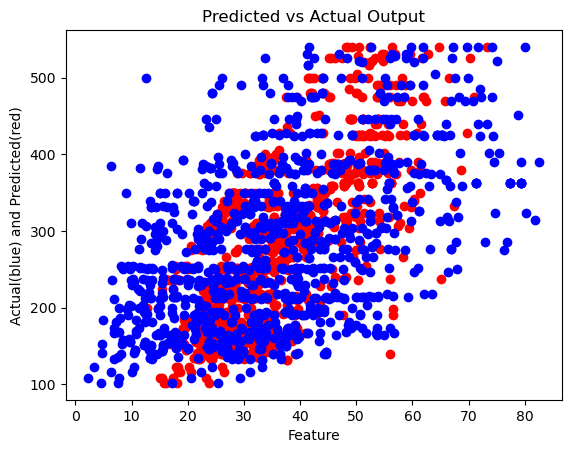

In [137]:
feature=df[columns[0]].values
ypred_list=np.dot(X,theta)

plt.title("Predicted vs Actual Output")
plt.xlabel("Feature")
plt.ylabel("Actual(blue) and Predicted(red)")
plt.scatter(ypred_list,feature,color='red')
plt.scatter(df[columns[8]].values,feature,color='blue')
plt.show()

In [138]:
from sklearn.metrics import r2_score

In [139]:
print(r2_score(df[columns[8]].values,ypred_list))

0.5741119298406243


In [135]:
theta

array([ 0.11086777,  0.08563226,  0.07900479, -0.08129357,  0.02331109,
       -0.00404853,  0.01082796,  0.09373068,  0.        ])